In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='KOR']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='KOR']
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='KOR']
KOR_table = pd.merge(gdp_table, pop_table, on=['Year'])
KOR_table = pd.merge(KOR_table, energy_table, on=['Year'])

In [8]:
complete_table = KOR_table
del complete_table['Entity_x']
del complete_table['Code_x']
del complete_table['145446-annotations']
del complete_table['Entity_y']
del complete_table['Code_y']

In [9]:
# complete_table['GDP'] = complete_table['GDP per capita	Total population (Gapminder, HYDE & UN)']* complete_table['Total population (Gapminder, HYDE & UN)   ']
complete_table.columns
complete_table.rename(columns={'GDP per capita':'GDPC','Total population (Gapminder, HYDE & UN)': 'Population','Primary energy consumption (TWh)': 'Energy'  }, inplace=True)
complete_table['GDP']= complete_table['GDPC']*complete_table['Population']
complete_table['EnergyC'] = complete_table['Energy']/complete_table['Population']
complete_table['Intensity'] = complete_table['Energy']/complete_table['GDP']

In [10]:
complete_table.head()

,Year,GDPC,Population,Entity,Code,Energy,GDP,EnergyC,Intensity
0,1965,1917.43,28896000,South Korea,KOR,74.690,5.540606e+10,0.000003,1.348048e-09
1,1966,2093.89,29573000,South Korea,KOR,90.592,6.192261e+10,0.000003,1.462987e-09
2,1967,2232.05,30237000,South Korea,KOR,104.114,6.749050e+10,0.000003,1.542647e-09
3,1968,2468.48,30892000,South Korea,KOR,119.353,7.625628e+10,0.000004,1.565156e-09
4,1969,2764.15,31544000,South Korea,KOR,144.076,8.719235e+10,0.000005,1.652393e-09


In [11]:
pop = KOR_table['Total population (Gapminder, HYDE & UN)']
gdp = KOR_table['GDP per capita']*pop
energy = KOR_table['Primary energy consumption (TWh)']
year = KOR_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

KeyError: 'Total population (Gapminder, HYDE & UN)'

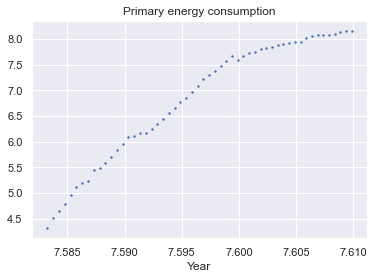

In [4]:

plt.scatter(np.log(year), np.log(energy), s=2) 
plt.xlabel('Year')
plt.title('Primary energy consumption')

r, y0 = reg.linReg(np.log(year), np.log(energy))


46.27451368186875 -91055.11213325919 1800 500 1 2000 2013 2200


Text(0, 0.5, 'Energy TWh')

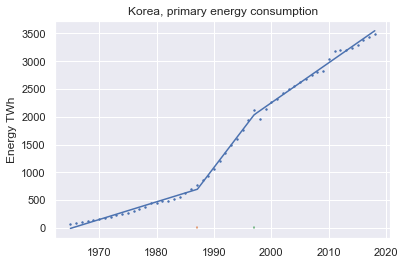

In [9]:
import math as math
plt.scatter(year, energy, s=2)
a, b = reg.linReg(year[:30], energy[:30])
a,b, c, e, g, x1, x2, x3 = a, b, 1800, 500, 1, 2000, 2013, 2200
print(a,b, c, e, g, x1, x2, x3)
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy, p0 =(a,b, c, e, g, x1, x2, x3 ), bounds = [-600000, 3000])
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3 ))
plt.plot([x1, x1], [0, 8], label=str(int(x1)))
plt.plot([x2, x2], [0, 8], label=str(int(x2)))
plt.title('Korea, primary energy consumption')
plt.ylabel("Energy TWh")


Text(0, 0.5, '10e12 $')

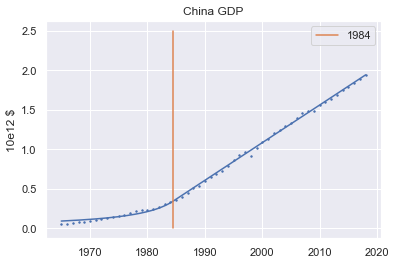

In [15]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('Korea GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 2.5], label=str(int(x1)))
# plt.plot([x2, x2], [0, 2.5], label=str(int(x2)))
plt.legend()
plt.ylabel('10e12 $')

No handles with labels found to put in legend.
(0.65303082768, 0.012016269999999999, 9.999725341796875, 0.002486218473026333, 0.0023053180718290533, 0.00021006140150622228)


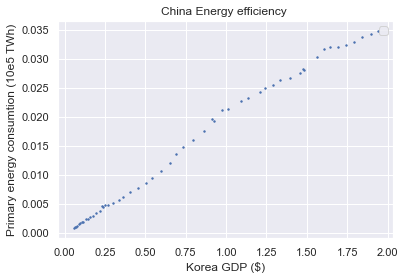

In [20]:
g= gdp/10**12
e = energy/10**5
gplot = np.linspace(g.min(), g.max()+10, 200)
plt.scatter(g,e, s= 2)
plt.xlabel('Korea GDP ($)')
plt.ylabel('Primary energy consumtion (10e5 TWh)')
plt.title('China Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [-0.01,3775300274660])
# plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-3.6399105472716804) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
# plt.plot([3.6399105472716804, 3.6399105472716804],[0.0, 0.4], label = str(year_infl))

e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
#plt.plot([gplot[e_max], gplot[e_max]], [0.0, 0.04], label = str(year_max)) 
plt.legend()

Text(0, 0.5, '10e-9 TWh/$')

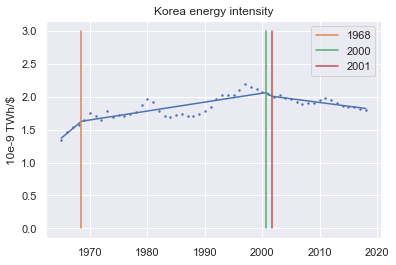

In [23]:
plt.scatter(year,(energy/gdp)*10**9, s=2)
a,b, c, e, g, x1, x2, x3 = 0.2, -394, -0.05, 0.8, -0.3, 1976, 2002,3000
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, (energy/gdp)*10**9, p0 = (0.2, -394, -0.05, 0.8, -0.3, 1976, 2002,2006)) 
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3))
plt.plot([x1, x1], [0, 3], label=str(int(x1)))
plt.plot([x2, x2], [0, 3], label=str(int(x2)))
plt.plot([x3, x3], [0, 3], label=str(int(x3)))
plt.legend()
plt.title("Korea energy intensity")
plt.ylabel("10e-9 TWh/$")


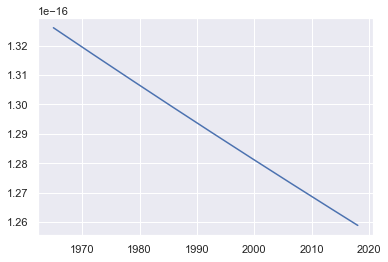

Text(0.5, 1.0, 'Variation in (%), Korea')

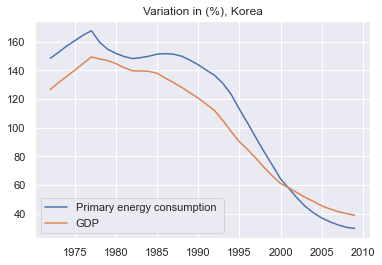

In [25]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), Korea")


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


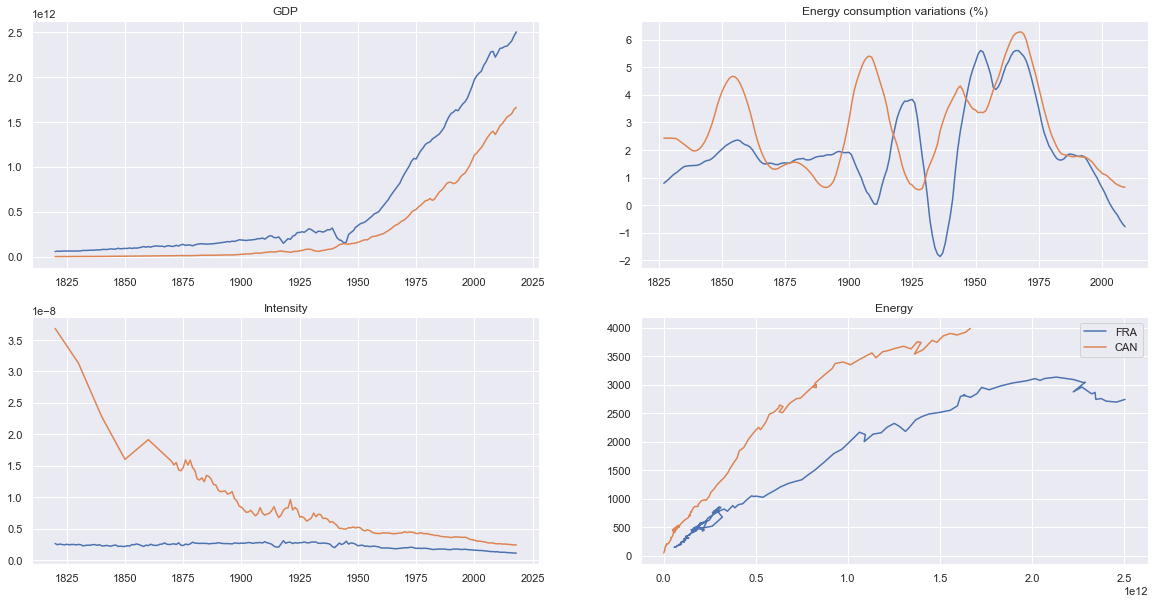

In [12]:
import data_visualization as dv 

table = dv.complete_table('ESP')
dv.comparative_plot_bis(countries=['FRA', 'CAN'], x_data=['Year', 'Year', 'Year', 'GDP' ], y_data=['GDP', 'dE', 'Intensity','Energy' ])



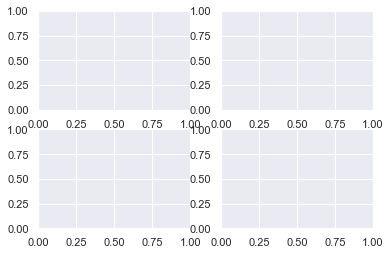

In [10]:
fig, axs = plt.subplots(2,2)

In [11]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)